In [2]:
pwd

'/content'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd '/content/drive/My Drive/Course/Data Science/Datacamp/Customer Analysis and AB Testing'

/content/drive/My Drive/Course/Data Science/Datacamp/Customer Analysis and AB Testing


In [0]:
ls

Customer_Analysis_and_AB_Testig.ipynb  data/  slides/


In [0]:
ls data

AB_testing_exercise.csv  user_demographics_paywall.csv
daily_revenue.csv        user_demographics_v1.csv
purchase_data_v1.csv


# Import libraries and configure display settings

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Loading & examining our data

In [4]:
# Load the customer_data
customer_data = pd.read_csv('data/user_demographics_v1.csv')

# Load the app_purchases
app_purchases = pd.read_csv('data/purchase_data_v1.csv')

# Print the columns of customer data
print(customer_data.columns)

# Print the columns of app_purchases
print(app_purchases.columns)

NameError: ignored

In [0]:
print(customer_data.head(10))

          uid              reg_date device gender country  age
0  54030035.0  2017-06-29T00:00:00Z    and      M     USA   19
1  72574201.0  2018-03-05T00:00:00Z    iOS      F     TUR   22
2  64187558.0  2016-02-07T00:00:00Z    iOS      M     USA   16
3  92513925.0  2017-05-25T00:00:00Z    and      M     BRA   41
4  99231338.0  2017-03-26T00:00:00Z    iOS      M     FRA   59
5  64229733.0  2017-05-17T00:00:00Z    and      F     USA   17
6  16377492.0  2016-10-16T00:00:00Z    and      M     BRA   20
7  36350096.0  2017-04-07T00:00:00Z    and      M     USA   23
8  98955454.0  2016-08-11T00:00:00Z    and      M     USA   22
9  40461463.0  2017-07-16T00:00:00Z    and      M     BRA   32


In [0]:
print(app_purchases.head(10))

         date       uid            sku  price
0  2017-07-10  41195147  sku_three_499    499
1  2017-07-15  41195147  sku_three_499    499
2  2017-11-12  41195147   sku_four_599    599
3  2017-09-26  91591874    sku_two_299    299
4  2017-12-01  91591874   sku_four_599    599
5  2016-12-12  90783242    sku_two_299    299
6  2017-06-12  90783242    sku_one_199    199
7  2017-10-11  90783242   sku_five_899    899
8  2017-10-27  90783242   sku_four_599    599
9  2018-01-04  90783242    sku_one_199    199


# Merging on different sets of fields

In [0]:
customer_data = customer_data.rename(columns = {'reg_date': 'date'})
print(customer_data.columns)

Index(['uid', 'date', 'device', 'gender', 'country', 'age'], dtype='object')


In [0]:
customer_data.date = customer_data.date.astype(str).map(lambda x: x.split('T')[0]).astype('object')

In [0]:
# Merge on the 'uid' and 'date' field
uid_date_combined_data = app_purchases.merge(customer_data, on=['uid', 'date'], how='inner')

# Examine the results 
print(uid_date_combined_data.head())
print(len(uid_date_combined_data))

         date       uid             sku  price device gender country  age
0  2016-03-30  94055095    sku_four_599    599    iOS      F     BRA   16
1  2015-10-28  69627745     sku_one_199    199    and      F     BRA   18
2  2017-02-02  11604973  sku_seven_1499    499    and      F     USA   16
3  2016-06-05  22495315    sku_four_599    599    and      F     USA   19
4  2018-02-17  51365662     sku_two_299    299    iOS      M     TUR   16
35


## Set potential KPIs

In [0]:
grouped_purchase_data = uid_date_combined_data.groupby(by = ['device', 'gender'])
purchase_summary= grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})
print(purchase_summary)

                    price                   
                     mean median         std
device gender                               
and    F       477.571429    499  200.685638
       M       511.500000    549  229.518129
iOS    F       427.571429    599  221.466971
       M       449.000000    499  164.316767


 calculate the average amount paid per purchase within a user's first 28 days.
 
 This KPI can provide a sense of the popularity of different in-app purchase price points to users within their first month.

In [0]:
purchase_data = customer_data.rename(columns = {'date':'reg_date'}).merge(app_purchases, on = 'uid', how = 'inner')
purchase_data.shape

(9006, 9)

In [0]:
purchase_data.reg_date = pd.to_datetime(purchase_data.reg_date)
print(purchase_data.reg_date.dtype)
print(purchase_data.reg_date[:10])

datetime64[ns]
0   2017-05-25
1   2017-05-25
2   2017-05-25
3   2017-05-25
4   2016-10-16
5   2016-10-16
6   2016-10-16
7   2017-04-07
8   2017-04-07
9   2017-04-07
Name: reg_date, dtype: datetime64[ns]


In [0]:
purchase_data.date = pd.to_datetime(purchase_data.date)
print(purchase_data.date.dtype)
print(purchase_data.date[:10])

datetime64[ns]
0   2017-10-20
1   2017-05-29
2   2017-08-23
3   2018-03-26
4   2018-03-17
5   2017-02-06
6   2017-03-01
7   2017-04-21
8   2017-06-04
9   2017-07-12
Name: date, dtype: datetime64[ns]


In [0]:
import datetime

# Compute max_purchase_date
current_date = pd.to_datetime('2018-3-17')
max_purchase_date = current_date - datetime.timedelta(days=28)

# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data[purchase_data.reg_date < max_purchase_date]

# Filter to contain only purchases within the first 28 days of registration
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date <= 
                        purchase_data_filt.reg_date + datetime.timedelta(days=28))]

# Output the mean price paid per purchase
print(purchase_data_filt.price.mean())

414.4237288135593


# Average purchase price by cohort

Building on the previous exercise, let's look at the same KPI, average purchase price, and a similar one, median purchase price, within the first 28 days. Additionally, let's look at these metrics not limited to 28 days to compare.

We can calculate these metrics across a set of cohorts and see what differences emerge. This is a useful task as it can help us understand how behaviors vary across cohorts.

Note that in our data the price variable is given in cents.

In [0]:
# Set the max registration date to be one month before today
max_reg_date = current_date - datetime.timedelta(days=28)

# Find the month 1 values
month1 = np.where((purchase_data.reg_date < max_reg_date) &
                 (purchase_data.date < purchase_data.reg_date + datetime.timedelta(days=28)),
                  purchase_data.price, 
                  np.NaN)
                 
# Update the value in the DataFrame
purchase_data['month1'] = month1

# Group the data by gender and device 
purchase_data_upd = purchase_data.groupby(by=['gender', 'device'], as_index=False) 

# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

  gender device      month1              price       
                       mean median        mean median
0      F    and  388.204545  299.0  400.747504    299
1      F    iOS  432.587786  499.0  404.435330    299
2      M    and  413.705882  399.0  416.237308    499
3      M    iOS  433.313725  499.0  405.272401    299


# Plotting time series data
In trying to boost purchases, we have made some changes to our introductory in-app purchase pricing. In this exercise, you will check if this is having an impact on the number of purchases made by purchasing users during their first week.

The dataset user_purchases has been joined to the demographics data and properly filtered. The column 'first_week_purchases' that is 1 for a first week purchase and 0 otherwise has been added. This column is converted to the average number of purchases made per day by users in their first week.

We will try to view the impact of this change by looking at a graph of purchases as described in the instructions.

The dataset provided on Datacamp ide is different from its data source. The data 'user_purchases' on Datacamp has  (92027, 11) shape.

In [0]:
ls data

AB_testing_exercise.csv  user_demographics_paywall.csv
daily_revenue.csv        user_demographics_v1.csv
purchase_data_v1.csv


In [0]:
from functools import wraps
import time

def timmer(func):
	'Return the value (in fractional seconds) of a performance counter.'

	@wraps(func)
	def wrapper_timmer(*args, **kwargs):

		t1 = time.perf_counter()
		result = func(*args, **kwargs)
		t2 = time.perf_counter()
		run_time=t2-t1
		print(f'Function {func.__name__} used {run_time: .4f} secs.')
		return result

	return wrapper_timmer

In [0]:
@timmer
def read_nlines(file_name):
  num_lines = sum(1 for line in open(file_name))
  print(f'total number of lines in {file_name} is {num_lines}')

from os import listdir
files = listdir('data')
print(files)
len(files)

for file in files:
  print('\n')
  read_nlines('data/'+ file)

['user_demographics_v1.csv', 'purchase_data_v1.csv', 'daily_revenue.csv', 'user_demographics_paywall.csv', 'AB_testing_exercise.csv']


total number of lines in data/user_demographics_v1.csv is 10001
Function read_nlines used  0.0066 secs.


total number of lines in data/purchase_data_v1.csv is 9007
Function read_nlines used  0.0044 secs.


total number of lines in data/daily_revenue.csv is 48001
Function read_nlines used  0.0155 secs.


total number of lines in data/user_demographics_paywall.csv is 1101
Function read_nlines used  0.0012 secs.


total number of lines in data/AB_testing_exercise.csv is 45884
Function read_nlines used  0.0097 secs.


In [0]:
# Merge on the 'uid' field
uid_combined_data = app_purchases.merge(customer_data, on=['uid'], how='left')

# Examine the results 
print(uid_combined_data.head())
print(uid_combined_data.shape)

         date       uid            sku  price              reg_date device gender country  age
0  2017-07-10  41195147  sku_three_499    499  2017-06-26T00:00:00Z    and      M     BRA   17
1  2017-07-15  41195147  sku_three_499    499  2017-06-26T00:00:00Z    and      M     BRA   17
2  2017-11-12  41195147   sku_four_599    599  2017-06-26T00:00:00Z    and      M     BRA   17
3  2017-09-26  91591874    sku_two_299    299  2017-01-05T00:00:00Z    and      M     TUR   17
4  2017-12-01  91591874   sku_four_599    599  2017-01-05T00:00:00Z    and      M     TUR   17
(9006, 9)


In [0]:
import datetime

uid_combined_data.reg_date=pd.to_datetime(uid_combined_data.reg_date.map(lambda x: x.split('T')[0]),format='%Y-%m-%d')
uid_combined_data['first_week_purchases']=pd.to_datetime(uid_combined_data.date) < uid_combined_data.reg_date + datetime.timedelta(days=7)
uid_combined_data['first_week_purchases']=uid_combined_data['first_week_purchases'].astype(int)
uid_combined_data.head()

,date,uid,sku,price,reg_date,device,gender,country,age,first_week_purchases
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,0
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,0
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,0
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,0
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,0


In [0]:
uid_combined_data.shape

(9006, 10)

In [0]:
user_purchases = uid_combined_data.copy()

# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

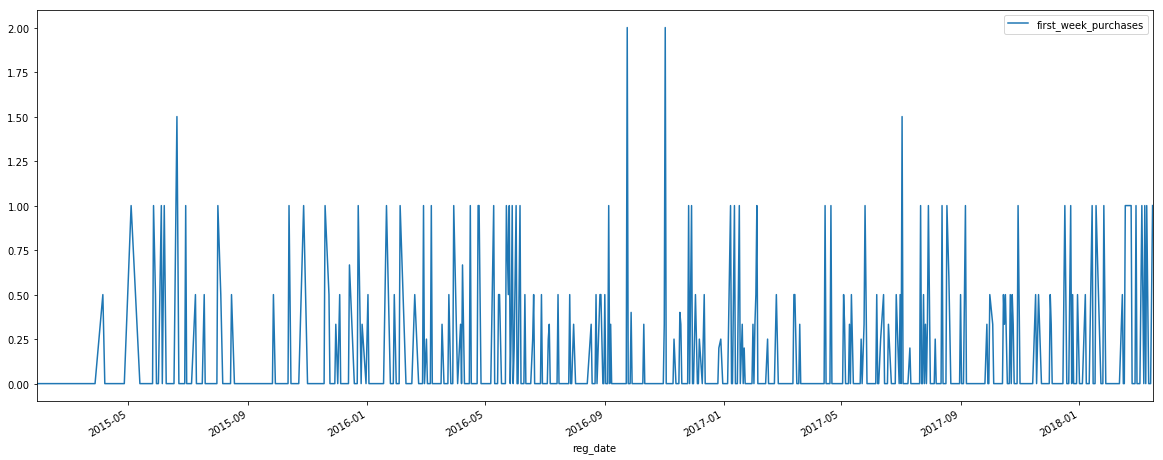

In [0]:
# Plot the results
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 8));
user_purchases.plot(x='reg_date', y='first_week_purchases', ax = plt.gca())
plt.show()

# Seasonality and moving averages
In this exercise, we will correct for weekly, monthly, and yearly seasonality and plot these over our raw data. This can reveal trends in a very powerful way.

Note: datacamp does not provide the acting dataset. I recognize it appears to be the total revenue per date.

In [11]:
daily_revenue = pd.read_csv('data/daily_revenue.csv')
print(daily_revenue.shape)
print(daily_revenue.sample(10))

(48000, 6)
       index  gender   device  revenue                  date country
21156    757    male  android  14888.0  2015-10-16T00:00:00Z     FRA
36555    556  female      ios  10469.0  2015-03-29T00:00:00Z     BRA
16186    587    male  android   9402.0  2015-04-29T00:00:00Z     DEU
19220     21    male      ios  29838.0  2013-10-10T00:00:00Z     FRA
11550    751    male  android   6309.0  2015-10-10T00:00:00Z     CAN
32438     39  female  android   1944.0  2013-10-28T00:00:00Z     GBR
33778    179    male      ios  34948.0  2014-03-17T00:00:00Z     BRA
46042    443  female      ios   5670.0  2014-12-06T00:00:00Z     TUR
40575    976    male  android  17581.0  2016-05-22T00:00:00Z     ESP
24063     64    male      ios   9630.0  2013-11-22T00:00:00Z     AUS


In [32]:
daily_revenue.dtypes

index            int64
gender          object
device          object
revenue        float64
date            object
country         object
7_day_rev      float64
28_day_rev     float64
365_day_rev    float64
dtype: object

In [35]:
daily_revenue.date = pd.to_datetime(daily_revenue.date.map(lambda x: x.split('T')[0]), format = '%Y-%m-%d')
daily_revenue.date[:10]

0   2013-09-20
1   2013-09-21
2   2013-09-22
3   2013-09-23
4   2013-09-24
5   2013-09-25
6   2013-09-26
7   2013-09-27
8   2013-09-28
9   2013-09-29
Name: date, dtype: datetime64[ns]

In [39]:
daily_rev_by_date = daily_revenue.groupby('date', as_index=False)['revenue'].sum()
daily_rev_by_date.head()

,date,revenue
0,2013-09-20,1040405.0
1,2013-09-21,998827.0
2,2013-09-22,950908.0
3,2013-09-23,890947.0
4,2013-09-24,942562.0


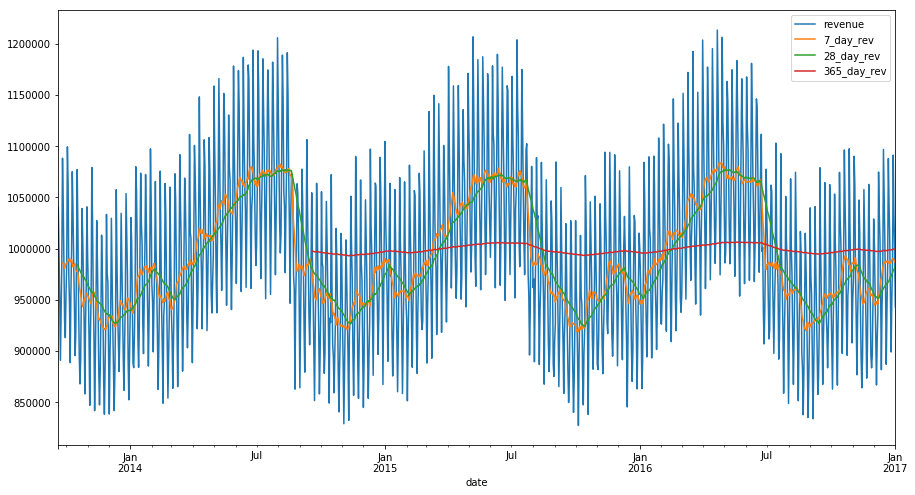

In [40]:
# Compute 7_day_rev
plt.figure(figsize=(15, 8));

daily_rev_by_date['7_day_rev'] = daily_rev_by_date.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_rev_by_date['28_day_rev'] = daily_rev_by_date.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_rev_by_date['365_day_rev'] = daily_rev_by_date.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_rev_by_date.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ], ax = plt.gca())
plt.show()

In [42]:
daily_rev_by_date.head(14)

,date,revenue,7_day_rev,28_day_rev,365_day_rev
0,2013-09-20,1040405.0,NaN,NaN,NaN
1,2013-09-21,998827.0,NaN,NaN,NaN
2,2013-09-22,950908.0,NaN,NaN,NaN
3,2013-09-23,890947.0,NaN,NaN,NaN
4,2013-09-24,942562.0,NaN,NaN,NaN
5,2013-09-25,986460.0,NaN,NaN,NaN
6,2013-09-26,1088210.0,985474.142857,NaN,NaN
7,2013-09-27,1044935.0,986121.285714,NaN,NaN
8,2013-09-28,982834.0,983836.571429,NaN,NaN
9,2013-09-29,928661.0,980658.428571,NaN,NaN


In [47]:
print(daily_rev_by_date.revenue[:7].mean())
print(daily_rev_by_date.revenue[1:8].mean())

985474.1428571428
986121.2857142857


although there are a lot of seasonality, revenue is somewhat flat over time

In the previous exercise, we saw that our revenue is somewhat flat over time. In this exercise we will dive deeper into the data to see if we can determine why this is the case. We will look at the revenue for a single in-app purchase product we are selling to see if this potentially reveals any trends. As this will have less data then looking at our overall revenue it will be much noisier. To account for this we will smooth the data using an exponential rolling average.

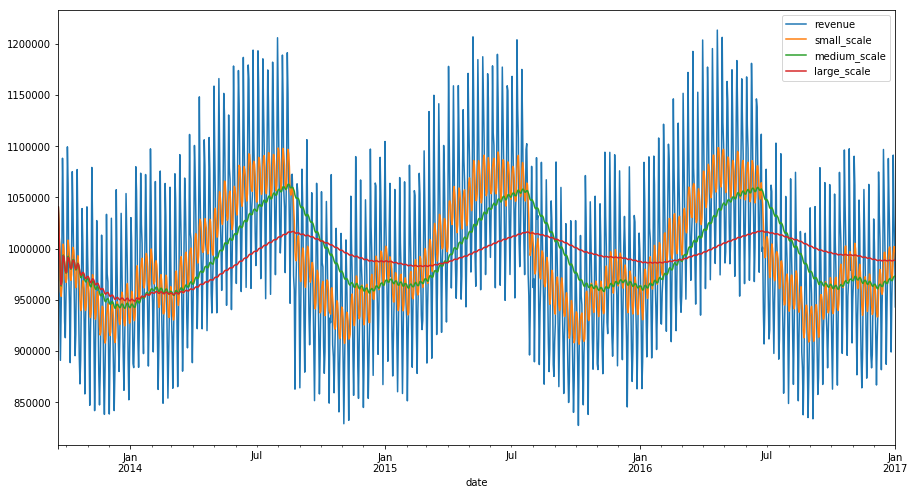

In [50]:
plt.figure(figsize=(15, 8))
# Calculate 'small_scale'
daily_rev_by_date['small_scale'] = daily_rev_by_date.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_rev_by_date['medium_scale'] = daily_rev_by_date.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_rev_by_date['large_scale'] = daily_rev_by_date.revenue.ewm(span=500).mean()

# Plot 'date' on the x-axis and, our three averages and 'revenue'
# on the y-axis
daily_rev_by_date.plot(x = 'date', y =['revenue', 'small_scale', 'medium_scale', 'large_scale'], ax=plt.gca())
plt.show()

In [51]:
daily_rev_by_date.head(14)

,date,revenue,7_day_rev,28_day_rev,365_day_rev,small_scale,medium_scale,large_scale
0,2013-09-20,1040405.0,NaN,NaN,NaN,1.040405e+06,1.040405e+06,1.040405e+06
1,2013-09-21,998827.0,NaN,NaN,NaN,1.017537e+06,1.019408e+06,1.019574e+06
2,2013-09-22,950908.0,NaN,NaN,NaN,9.907526e+05,9.961166e+05,9.965940e+05
3,2013-09-23,890947.0,NaN,NaN,NaN,9.578711e+05,9.690302e+05,9.700236e+05
4,2013-09-24,942562.0,NaN,NaN,NaN,9.534763e+05,9.635227e+05,9.644872e+05
5,2013-09-25,986460.0,NaN,NaN,NaN,9.620433e+05,9.675393e+05,9.681861e+05
6,2013-09-26,1088210.0,985474.142857,NaN,NaN,9.924444e+05,9.858293e+05,9.855388e+05
7,2013-09-27,1044935.0,986121.285714,NaN,NaN,1.004386e+06,9.937449e+05,9.930677e+05
8,2013-09-28,982834.0,983836.571429,NaN,NaN,9.996973e+05,9.924334e+05,9.919123e+05
9,2013-09-29,928661.0,980658.428571,NaN,NaN,9.847756e+05,9.854671e+05,9.854727e+05


# Visualizing user spending
Recently, the Product team made some big changes to both the Android & iOS apps. They do not have any direct concerns about the impact of these changes, but want you to monitor the data to make sure that the changes don't hurt company revenue. Additionally, the product team believes that some of these changes may impact female users more than male users.

In this exercise you're going to plot the monthly revenue for one of the updated products and evaluate the results.

Again, I need to simulate the data that is used in this exercise. It appears to use only the first date of each month.

In [77]:
user_revenue = daily_revenue[daily_revenue.date.map(lambda x: x.day == 1)]
print(user_revenue.shape)
print(user_revenue.head(10))

(1600, 10)
     index gender device   revenue       date country      7_day_rev     28_day_rev  365_day_rev    month
11      12   male    ios  165338.0 2013-10-01     USA  176817.714286            NaN          NaN  2013-10
42      43   male    ios  176682.0 2013-11-01     USA  174233.285714  173272.107143          NaN  2013-11
72      73   male    ios  169003.0 2013-12-01     USA  168047.857143  170509.392857          NaN  2013-12
103    104   male    ios  157034.0 2014-01-01     USA  169640.000000  169035.392857          NaN  2014-01
134    135   male    ios  169522.0 2014-02-01     USA  179232.428571  177230.178571          NaN  2014-02
162    163   male    ios  174478.0 2014-03-01     USA  167584.714286  174149.107143          NaN  2014-03
193    194   male    ios  169198.0 2014-04-01     USA  178053.571429  177700.821429          NaN  2014-04
223    224   male    ios  207682.0 2014-05-01     USA  186418.571429  184184.500000          NaN  2014-05
254    255   male    ios  190644.0 

turns out the revenue on each date does not match the datacamp dataset. It's revenue is much higher than mine. It might be the revenue grouped by month, gender, then device, but the date was showed as 'year-month-01' to indicate subjected month. That was confusing.

In [83]:
daily_revenue['month'] = daily_revenue.date.dt.strftime('%Y-%m')
user_revenue = daily_revenue.groupby(['month', 'gender', 'device'])['revenue'].sum().reset_index()
user_revenue.head(10)

,month,gender,device,revenue
0,2013-09,female,android,1144057.0
1,2013-09,female,ios,1543801.0
2,2013-09,male,android,3447967.0
3,2013-09,male,ios,4631978.0
4,2013-10,female,android,3233420.0
5,2013-10,female,ios,4345341.0
6,2013-10,male,android,9685265.0
7,2013-10,male,ios,12834918.0
8,2013-11,female,android,3004144.0
9,2013-11,female,ios,4024076.0


I got it right! Now I can continue the seasonality EDA exercise.

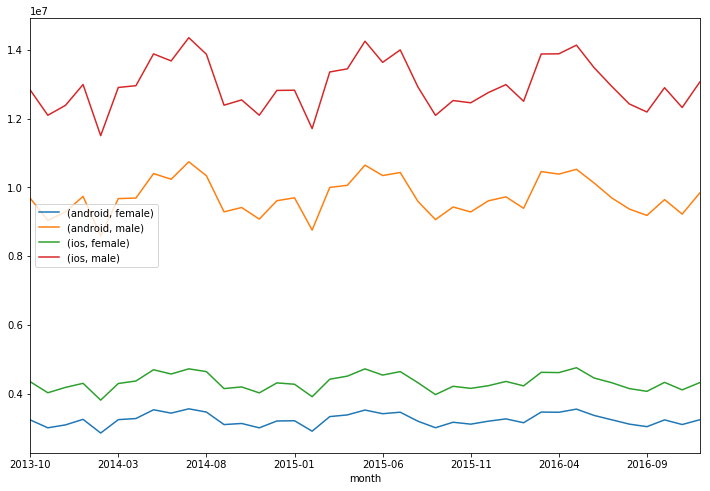

In [88]:
plt.figure(figsize=(12, 8))
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot(ax=plt.gca())
plt.gca().legend(loc='center left')
plt.show()

From this view, it seems like our aggregate revenue is fairly stable, so the changes are most likely not hurting revenue.